# LIFE EXPECTANCY AND HEALTHY LIFE EXPECTANCY (AT BIRTH)

Average life expectancy and healthy life expectancy are both important headline measures of the health status of the population. The healthy life expectancy measure adds a ‘quality of life’ dimension to estimates of life expectancy by dividing it into time spent in different states of health. The number of years of life in poor health is also important as it relates more closely to the demand for health and social care and the associated costs.
However, when comparing outcomes for groups with very different life expectancies, the proportion of life spent in poor health is also useful.

'Globally, life expectancy has increased significantly over the years. Between 2000 and 2019, life expectancy rose by more than 6 years, from 66.8 years to 73.4 years. While healthy life expectancy (HALE) has also increased by 8% from 58.3 in 2000 to 63.7, in 2019, this was due to declining mortality rather than reduced years lived with disability. In other words, the increase in HALE (5.4 years) has not kept pace with the increase in life expectancy (6.6 years).'
Source - "GHE: Life expectancy and healthy life expectancy"-https://www.who.int/data/gho/data/themes/mortality-and-global-health-estimates/ghe-life-expectancy-and-healthy-life-expectancy 

###                              Importing, Understanding, Cleansing and Handling

In [1]:
import pandas as pd # setup
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt

In [2]:
# Create a Pandas dataframe with dataset
life_exp = pd.read_csv("World Life_exp@birth.csv")
healthy_exp = pd.read_csv("World Healthy Life expectancy.csv")
#data source: https://https://data.who.int/countries/566

In [3]:
# Looking at the datasets shape
print(life_exp.shape, healthy_exp.shape)

(2904, 13) (2904, 13)


## LIFE EXPECTANCY AT BIRTH

In [4]:
display(life_exp.head(2))# Checking the head of data
display(life_exp.describe())# Summary statistics of numeric columns
display(life_exp.info())# Let's have a look at our data again

,IND_ID,IND_CODE,IND_UUID,IND_PER_CODE,DIM_TIME,DIM_TIME_TYPE,DIM_GEO_CODE_M49,DIM_GEO_CODE_TYPE,DIM_PUBLISH_STATE_CODE,IND_NAME,GEO_NAME_SHORT,DIM_SEX,AMOUNT_N
0,90E2E48WHOSIS_000001,WHOSIS_000001,90E2E48,WHOSIS_000001,2000,YEAR,953,WHOREGION,PUBLISHED,Life expectancy (at birth),Africa,FEMALE,54.30957
1,90E2E48WHOSIS_000001,WHOSIS_000001,90E2E48,WHOSIS_000001,2019,YEAR,32,COUNTRY,PUBLISHED,Life expectancy (at birth),Argentina,FEMALE,79.50281


,DIM_TIME,DIM_GEO_CODE_M49,AMOUNT_N
count,2904.000000,2904.000000,2904.000000
mean,2012.983471,451.826446,70.448479
std,7.510223,272.894132,8.571435
min,2000.000000,1.000000,27.966830
25%,2010.000000,214.000000,64.742437
50%,2015.000000,434.000000,71.673385
75%,2019.000000,690.000000,76.955553
max,2021.000000,958.000000,87.158035


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IND_ID                  2904 non-null   object 
 1   IND_CODE                2904 non-null   object 
 2   IND_UUID                2904 non-null   object 
 3   IND_PER_CODE            2904 non-null   object 
 4   DIM_TIME                2904 non-null   int64  
 5   DIM_TIME_TYPE           2904 non-null   object 
 6   DIM_GEO_CODE_M49        2904 non-null   int64  
 7   DIM_GEO_CODE_TYPE       2904 non-null   object 
 8   DIM_PUBLISH_STATE_CODE  2904 non-null   object 
 9   IND_NAME                2904 non-null   object 
 10  GEO_NAME_SHORT          2904 non-null   object 
 11  DIM_SEX                 2904 non-null   object 
 12  AMOUNT_N                2904 non-null   float64
dtypes: float64(1), int64(2), object(10)
memory usage: 295.1+ KB


None

In [5]:
# Checking for null values and duplicates
life_exp.isna().sum()

IND_ID                    0
IND_CODE                  0
IND_UUID                  0
IND_PER_CODE              0
DIM_TIME                  0
DIM_TIME_TYPE             0
DIM_GEO_CODE_M49          0
DIM_GEO_CODE_TYPE         0
DIM_PUBLISH_STATE_CODE    0
IND_NAME                  0
GEO_NAME_SHORT            0
DIM_SEX                   0
AMOUNT_N                  0
dtype: int64

In [6]:
# Checking for duplicates
life_exp.duplicated().sum()

0

In [7]:
#There are many columns that are not important for this analysis. 
#Drop these columns for easier handling of data and clearer analysis
life_exp.drop(columns={'IND_ID','IND_CODE','IND_UUID','IND_PER_CODE','DIM_TIME_TYPE','DIM_PUBLISH_STATE_CODE',\
                         'IND_NAME'}, axis = 1, inplace = True)

In [8]:
#Rename the columns for a better visualisation and understanding
life_exp.rename({'DIM_TIME': 'Year', 'DIM_GEO_CODE_M49':'Area Code','DIM_GEO_CODE_TYPE':'Geographic Dimension',\
                 'GEO_NAME_SHORT':'Location','DIM_SEX':'Gender','AMOUNT_N':'Life expectancy(at birth)'}\
                  ,axis=1, inplace=True)

In [9]:
# Change the format of two columns for a better view
def capitalize_first_letter(text):
    return text.capitalize()
life_exp['Gender'] = life_exp['Gender'].apply(capitalize_first_letter)
life_exp['Geographic Dimension'] = life_exp['Geographic Dimension'].apply(capitalize_first_letter)
life_exp.head()

,Year,Area Code,Geographic Dimension,Location,Gender,Life expectancy(at birth)
0,2000,953,Whoregion,Africa,Female,54.30957
1,2019,32,Country,Argentina,Female,79.50281
2,2000,64,Country,Bhutan,Female,66.59171
3,2019,428,Country,Latvia,Female,79.83988
4,2019,384,Country,Côte d'Ivoire,Female,65.81046


In [10]:
#Round the numerical values
life_exp['Life expectancy(at birth)'] = round(life_exp['Life expectancy(at birth)'])
life_exp.head()

,Year,Area Code,Geographic Dimension,Location,Gender,Life expectancy(at birth)
0,2000,953,Whoregion,Africa,Female,54.0
1,2019,32,Country,Argentina,Female,80.0
2,2000,64,Country,Bhutan,Female,67.0
3,2019,428,Country,Latvia,Female,80.0
4,2019,384,Country,Côte d'Ivoire,Female,66.0


In [11]:
life_exp.info()#Get information on the data set, such as the number of non-null items in coloumns
# Looks like the datasets are all complete 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       2904 non-null   int64  
 1   Area Code                  2904 non-null   int64  
 2   Geographic Dimension       2904 non-null   object 
 3   Location                   2904 non-null   object 
 4   Gender                     2904 non-null   object 
 5   Life expectancy(at birth)  2904 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 136.3+ KB


In [12]:
# Look at the different values in the 'Geographic Dimension' column, and how many of each of category there are
life_exp['Geographic Dimension'].value_counts()

Geographic Dimension
Country                                2745
Whoregion                                90
Worldbankincomegroup                     48
Global                                   15
Organized, unincorporated territory       3
National liberation movement              3
Name: count, dtype: int64

## HEALTHY LIFE EXPECTANCY AT BIRTH  (HALE)

HALE represents the number of years a person can expect to live in good health. It considers both longevity and quality of life.

In [13]:
display(healthy_exp.head(2))# Checking the head of data
display(healthy_exp.describe())# Summary statistics of numeric columns
display(healthy_exp.info())# Let's have a look at our data again

,IND_ID,IND_CODE,IND_UUID,IND_PER_CODE,DIM_TIME,DIM_TIME_TYPE,DIM_GEO_CODE_M49,DIM_GEO_CODE_TYPE,DIM_PUBLISH_STATE_CODE,IND_NAME,GEO_NAME_SHORT,DIM_SEX,AMOUNT_N
0,C64284DWHOSIS_000002,WHOSIS_000002,C64284D,WHOSIS_000002,2000,YEAR,404,COUNTRY,PUBLISHED,Healthy life expectancy (at birth),Kenya,FEMALE,47.24839
1,C64284DWHOSIS_000002,WHOSIS_000002,C64284D,WHOSIS_000002,2019,YEAR,368,COUNTRY,PUBLISHED,Healthy life expectancy (at birth),Iraq,FEMALE,63.70298


,DIM_TIME,DIM_GEO_CODE_M49,AMOUNT_N
count,2904.000000,2904.000000,2904.000000
mean,2012.983471,451.826446,61.490168
std,7.510223,272.894132,7.316264
min,2000.000000,1.000000,25.374440
25%,2010.000000,214.000000,56.637653
50%,2015.000000,434.000000,62.920659
75%,2019.000000,690.000000,66.960958
max,2021.000000,958.000000,75.481930


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IND_ID                  2904 non-null   object 
 1   IND_CODE                2904 non-null   object 
 2   IND_UUID                2904 non-null   object 
 3   IND_PER_CODE            2904 non-null   object 
 4   DIM_TIME                2904 non-null   int64  
 5   DIM_TIME_TYPE           2904 non-null   object 
 6   DIM_GEO_CODE_M49        2904 non-null   int64  
 7   DIM_GEO_CODE_TYPE       2904 non-null   object 
 8   DIM_PUBLISH_STATE_CODE  2904 non-null   object 
 9   IND_NAME                2904 non-null   object 
 10  GEO_NAME_SHORT          2904 non-null   object 
 11  DIM_SEX                 2904 non-null   object 
 12  AMOUNT_N                2904 non-null   float64
dtypes: float64(1), int64(2), object(10)
memory usage: 295.1+ KB


None

In [14]:
# Checking for null values 
healthy_exp.isna().sum()

IND_ID                    0
IND_CODE                  0
IND_UUID                  0
IND_PER_CODE              0
DIM_TIME                  0
DIM_TIME_TYPE             0
DIM_GEO_CODE_M49          0
DIM_GEO_CODE_TYPE         0
DIM_PUBLISH_STATE_CODE    0
IND_NAME                  0
GEO_NAME_SHORT            0
DIM_SEX                   0
AMOUNT_N                  0
dtype: int64

In [15]:
# Checking for duplicates
healthy_exp.duplicated().sum()

0

In [16]:
#There are many columns that are not important for this analysis. 
# Drop these columns for easier handling of data and clearer analysis
healthy_exp.drop(columns={'IND_ID','IND_CODE','IND_UUID','IND_PER_CODE','DIM_TIME_TYPE','DIM_PUBLISH_STATE_CODE','IND_NAME'},\
                 axis = 1, inplace = True)

In [17]:
#Rename the columns for a better visualisation and understanding
healthy_exp.rename({'DIM_TIME': 'Year', 'DIM_GEO_CODE_M49':'Area Code','DIM_GEO_CODE_TYPE':'Geographic Dimension',\
                 'GEO_NAME_SHORT':'Location','DIM_SEX':'Gender','AMOUNT_N':'Healthy life expectancy(at birth)'},\
                   axis=1, inplace=True)

In [18]:
# Change the format of two columns for a better view
def capitalize_first_letter(text):
    return text.capitalize()
healthy_exp['Gender'] = healthy_exp['Gender'].apply(capitalize_first_letter)
healthy_exp['Geographic Dimension'] = healthy_exp['Geographic Dimension'].apply(capitalize_first_letter)
healthy_exp.head()

,Year,Area Code,Geographic Dimension,Location,Gender,Healthy life expectancy(at birth)
0,2000,404,Country,Kenya,Female,47.24839
1,2019,368,Country,Iraq,Female,63.70298
2,2015,340,Country,Honduras,Female,62.56406
3,2010,152,Country,Chile,Female,69.82394
4,2019,598,Country,Papua New Guinea,Female,58.06359


In [19]:
#Round the numerical values
healthy_exp['Healthy life expectancy(at birth)'] = round(healthy_exp['Healthy life expectancy(at birth)'])
healthy_exp.head()

,Year,Area Code,Geographic Dimension,Location,Gender,Healthy life expectancy(at birth)
0,2000,404,Country,Kenya,Female,47.0
1,2019,368,Country,Iraq,Female,64.0
2,2015,340,Country,Honduras,Female,63.0
3,2010,152,Country,Chile,Female,70.0
4,2019,598,Country,Papua New Guinea,Female,58.0


### Merging

In [20]:
# Joining the two datasets for a better visualisation 
df_merging = life_exp.merge(healthy_exp, on=["Area Code","Year","Gender","Geographic Dimension","Location"])
df_merging

,Year,Area Code,Geographic Dimension,Location,Gender,Life expectancy(at birth),Healthy life expectancy(at birth)
0,2000,953,Whoregion,Africa,Female,54.0,47.0
1,2019,32,Country,Argentina,Female,80.0,69.0
2,2000,64,Country,Bhutan,Female,67.0,57.0
3,2019,428,Country,Latvia,Female,80.0,69.0
4,2019,384,Country,Côte d'Ivoire,Female,66.0,56.0
...,...,...,...,...,...,...,...
2899,2021,678,Country,Sao Tome and Principe,Total,71.0,62.0
2900,2021,682,Country,Saudi Arabia,Total,76.0,66.0
2901,2021,686,Country,Senegal,Total,68.0,59.0
2902,2021,688,Country,Serbia,Total,73.0,64.0


In [21]:
df_merging.describe(include='object').T

,count,unique,top,freq
Geographic Dimension,2904,6,Country,2745
Location,2904,196,Africa,15
Gender,2904,3,Female,968


In [22]:
# Select the "Gender" column and group by "Life expectancy (at birth)" and "Healthy life expectancy (at birth)" mean.
gender_compare = df_merging.groupby(by='Gender')[['Life expectancy(at birth)','Healthy life expectancy(at birth)']].mean()
gender_compare

,Life expectancy(at birth),Healthy life expectancy(at birth)
Gender,,
Female,72.911157,62.750000
Male,68.022727,60.247934
Total,70.419421,61.496901


<Figure size 640x480 with 0 Axes>

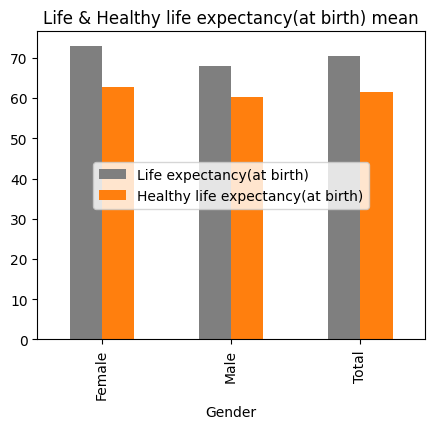

In [23]:
plt.figure()
bar_colors = ['tab:gray', 'tab:orange']
gender_compare.plot.bar(figsize=(5,4), color=bar_colors).set(title='Life & Healthy life expectancy(at birth) mean')
plt.legend(loc='center')
plt.show();

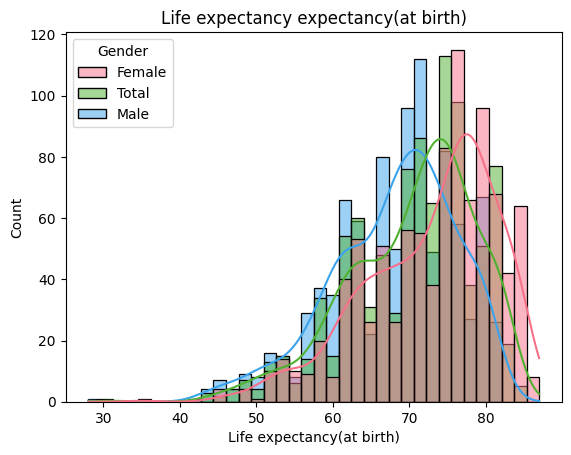

In [24]:
hue_order = ['Female', 'Total', 'Male']
sns.histplot(data = life_exp, x = "Life expectancy(at birth)", hue = "Gender", kde = True, hue_order=hue_order, palette="husl")\
.set_title('Life expectancy expectancy(at birth)')
plt.show()

Text(0.5, 1.0, 'Healthy life expectancy(at birth)')

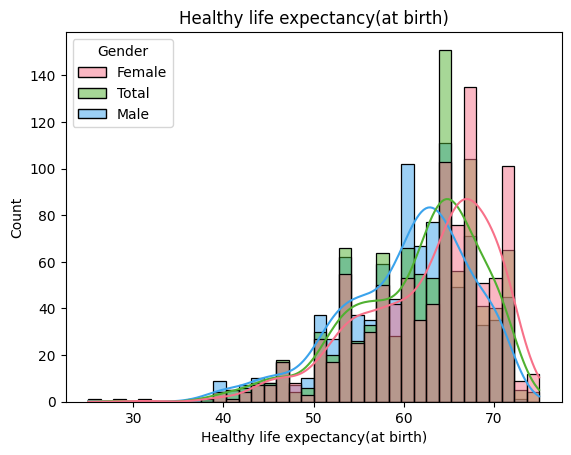

In [25]:
hue_order = ['Female', 'Total', 'Male']
sns.histplot(data = healthy_exp, x = "Healthy life expectancy(at birth)", hue = "Gender", kde = True, hue_order=hue_order, palette="husl")\
.set_title('Healthy life expectancy(at birth)')

From this bar chart we can clearly see that the average life and healthy life expectancy (at birth) for women is significantly higher than that of men.

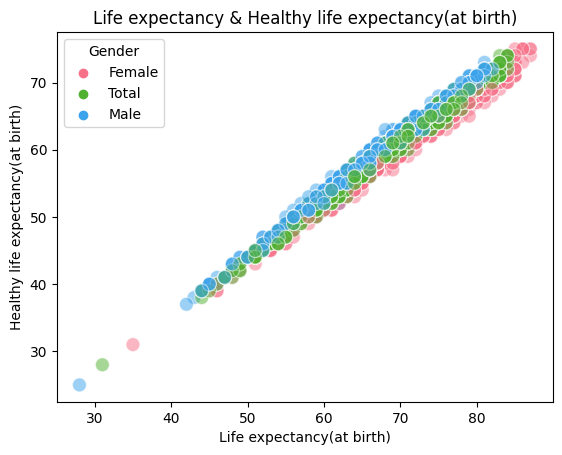

In [26]:
# Another way to visualise the relationship between 'Life expectancy & Healthy life expectancy(at birth) by "Gender".
hue_order = ['Female', 'Total', 'Male']
sns.scatterplot(x='Life expectancy(at birth)', y='Healthy life expectancy(at birth)',data=df_merging, hue ='Gender', 
                hue_order=hue_order, palette="husl", s=100, alpha=.5).set_title('Life expectancy & Healthy life expectancy(at birth)')
plt.show()

Starting with 'Geographic Dimension' categories

In [27]:
df_merging['Geographic Dimension'].value_counts()

Geographic Dimension
Country                                2745
Whoregion                                90
Worldbankincomegroup                     48
Global                                   15
Organized, unincorporated territory       3
National liberation movement              3
Name: count, dtype: int64

## Global Analysis 

In [28]:
# Select the "Global" category from the "Geographic Dimension" and sort by "Life expectancy (at birth)" and 
#"Healthy life expectancy (at birth)" in descending order.
world = df_merging.copy()
world = df_merging[df_merging['Geographic Dimension'] =='Global'].sort_values(by=["Life expectancy(at birth)",\
                                                                    "Healthy life expectancy(at birth)"], ascending=False)
world

,Year,Area Code,Geographic Dimension,Location,Gender,Life expectancy(at birth),Healthy life expectancy(at birth)
465,2019,1,Global,World,Female,76.0,65.0
162,2015,1,Global,World,Female,75.0,64.0
65,2021,1,Global,World,Female,74.0,63.0
2431,2019,1,Global,World,Total,73.0,64.0
216,2010,1,Global,World,Female,73.0,63.0
2376,2015,1,Global,World,Total,72.0,63.0
1134,2019,1,Global,World,Male,71.0,63.0
2529,2010,1,Global,World,Total,71.0,62.0
2669,2021,1,Global,World,Total,71.0,62.0
1026,2015,1,Global,World,Male,70.0,62.0


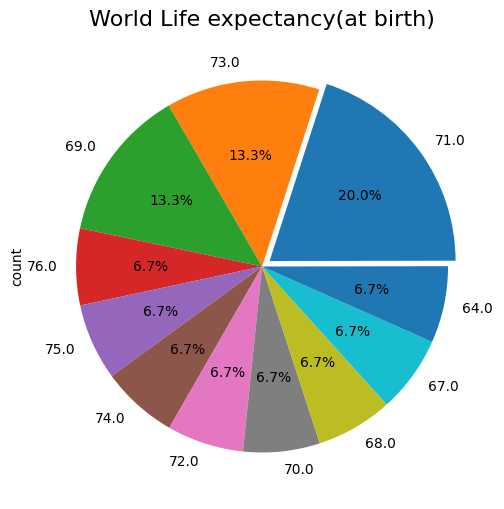

In [29]:
# Creating a first visulisation with MatPlotLib:
plt.figure(figsize=(11,5))
world["Life expectancy(at birth)"].value_counts().plot.pie(autopct='%1.1f%%',figsize=(6,7),startangle = 0.1,\
    explode = [0.05, 0, 0,0,0,0,0,0,0,0,0])
plt.title("World Life expectancy(at birth)", fontsize=16)
plt.show()

Worldwide, "Life expectancy at birth" is predominant at 71 years, followed by 73 and 69 years.

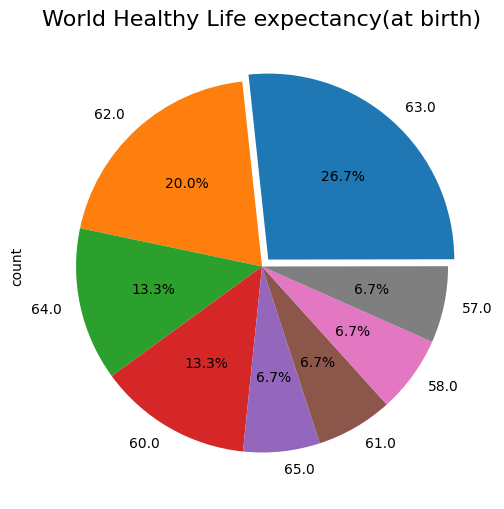

In [30]:
plt.figure(figsize=(9,5))
world["Healthy life expectancy(at birth)"].value_counts().plot.pie(autopct='%1.1f%%',figsize=(6,7),startangle = 0.1,\
    explode = [0.05, 0, 0,0,0,0,0,0])
plt.title("World Healthy Life expectancy(at birth)", fontsize=16)
plt.show()

Compared to 'life expectancy at birth', 'healthy life expectancy (at birth)' is much lower at 63 years, followed by 62 years.

## Analysing WHO regions - Africa and Europe

In [31]:
# Select the "Whoregion" category from the "Geographic Dimension" and sort by Year"
who_reg = df_merging.copy()
who_reg = df_merging[df_merging['Geographic Dimension'] =='Whoregion'].sort_values(by="Year")
who_reg

,Year,Area Code,Geographic Dimension,Location,Gender,Life expectancy(at birth),Healthy life expectancy(at birth)
0,2000,953,Whoregion,Africa,Female,54.0,47.0
2770,2000,958,Whoregion,Western Pacific,Male,70.0,63.0
2023,2000,956,Whoregion,Europe,Female,77.0,66.0
1982,2000,954,Whoregion,Americas,Total,74.0,64.0
1918,2000,953,Whoregion,Africa,Total,53.0,46.0
...,...,...,...,...,...,...,...
1553,2021,958,Whoregion,Western Pacific,Male,75.0,67.0
1117,2021,954,Whoregion,Americas,Male,71.0,62.0
1402,2021,956,Whoregion,Europe,Male,73.0,65.0
768,2021,955,Whoregion,South-East Asia,Female,70.0,60.0


Having a first look at the relational plot for WHO regions we can determine that women have a higher "Life expectancy" and " Healthy life expectancy(at birth)" than men throughout all regions.

/kas/python_stacks/python_311_data_science/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x700 with 0 Axes>

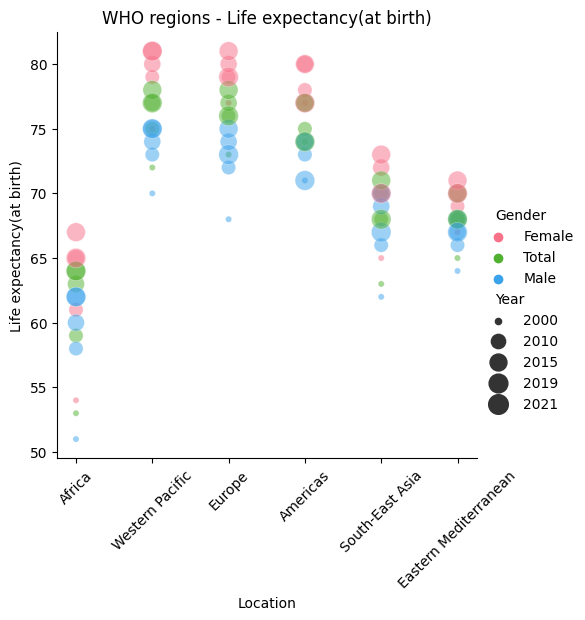

In [32]:
plt.figure(figsize=(6, 7))
hue_order = ['Female', 'Total', 'Male']
sns.relplot(x='Location', y='Life expectancy(at birth)', hue='Gender',hue_order= hue_order, size='Year',
            sizes=(20, 200), alpha=.5, palette="husl",
            height=5, data=who_reg).set(title='WHO regions - Life expectancy(at birth)')
plt.xticks(rotation=45);
plt.show()

/kas/python_stacks/python_311_data_science/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x700 with 0 Axes>

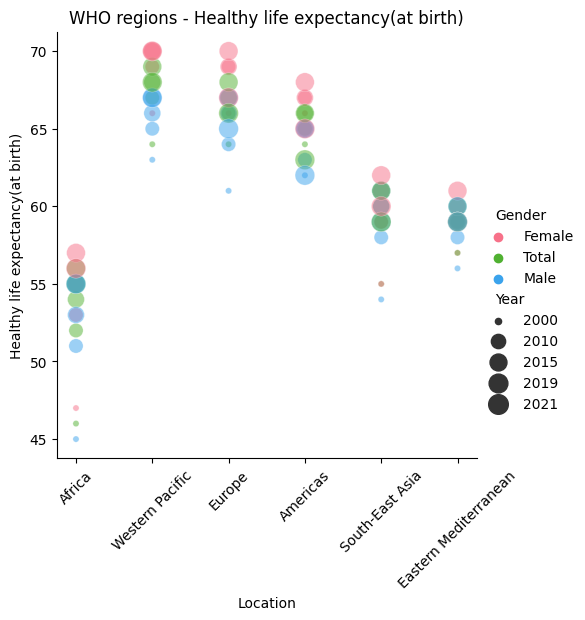

In [33]:
plt.figure(figsize=(6, 7))
hue_order = ['Female', 'Total', 'Male']
sns.relplot(x='Location', y='Healthy life expectancy(at birth)', hue='Gender',hue_order=hue_order, size='Year',
            sizes=(20, 200), alpha=.5, palette="husl",
            height=5, data=who_reg).set(title='WHO regions - Healthy life expectancy(at birth)')
plt.xticks(rotation=45);
plt.show()

In [34]:
# Select the continent "Africa" from the "Location" and sort by "Year", "Life and Healthy life expectancy(at birth)"
who_reg_afr = who_reg.copy()
who_reg_afr = who_reg[who_reg['Location'] == 'Africa'].sort_values(by=["Year","Life expectancy(at birth)",\
                                                                       "Healthy life expectancy(at birth)"])
who_reg_afr

,Year,Area Code,Geographic Dimension,Location,Gender,Life expectancy(at birth),Healthy life expectancy(at birth)
1005,2000,953,Whoregion,Africa,Male,51.0,45.0
1918,2000,953,Whoregion,Africa,Total,53.0,46.0
0,2000,953,Whoregion,Africa,Female,54.0,47.0
936,2010,953,Whoregion,Africa,Male,58.0,51.0
205,2010,953,Whoregion,Africa,Total,59.0,52.0
39,2010,953,Whoregion,Africa,Female,61.0,53.0
2172,2015,953,Whoregion,Africa,Male,60.0,53.0
2013,2015,953,Whoregion,Africa,Total,63.0,54.0
233,2015,953,Whoregion,Africa,Female,65.0,55.0
829,2019,953,Whoregion,Africa,Male,62.0,55.0


/kas/python_stacks/python_311_data_science/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

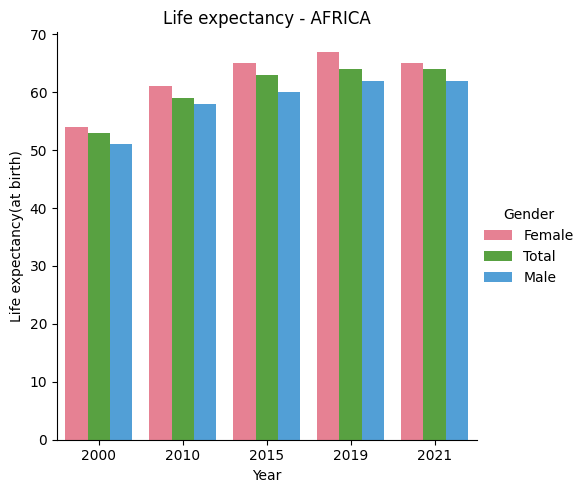

In [35]:
plt.figure(figsize=(6,5))
hue_order = ['Female', 'Total', 'Male']
sns.catplot(x='Year', y='Life expectancy(at birth)', col='Location', hue='Gender', hue_order=hue_order, kind="bar",\
            data=who_reg_afr, palette="husl").set(title='Life expectancy - AFRICA')

In [36]:
who_reg_afr_mean = who_reg_afr.copy()
who_reg_afr_mean = who_reg_afr['Life expectancy(at birth)'].mean()
who_reg_afr_mean

60.53333333333333

/kas/python_stacks/python_311_data_science/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

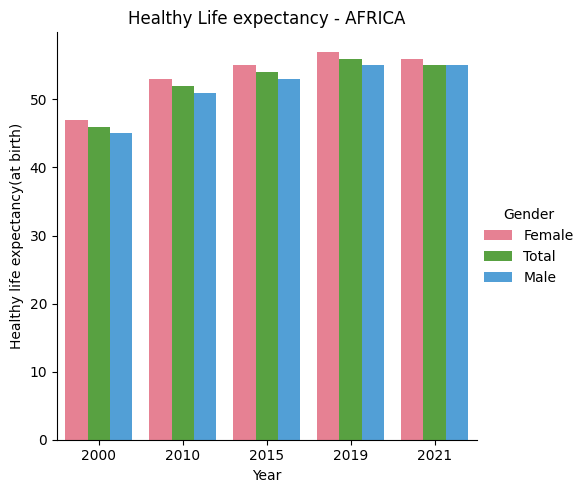

In [37]:
plt.figure(figsize=(6,5))
hue_order = ['Female', 'Total', 'Male']
sns.catplot(x='Year', y='Healthy life expectancy(at birth)', col='Location',hue='Gender', hue_order=hue_order,\
            kind="bar", data=who_reg_afr, palette="husl").set(title='Healthy Life expectancy - AFRICA')

In [38]:
who_reg_afr_mean = who_reg_afr.copy()
who_reg_afr_mean = who_reg_afr_mean['Healthy life expectancy(at birth)'].mean()
who_reg_afr_mean

52.666666666666664

In 2019, the average healthy life expectancy for someone in Africa was approximately 56 years. This metric considers the number of years a person can expect to live in good health. However, it’s essential to note that overall life expectancy in Africa is just under 63 years, indicating that health challenges impact both longevity and quality of life in the region. 

In [39]:
# Select the continent "Europe" from the "Location" and sort by "Year", "Life and Healthy life expectancy(at birth)"
who_reg_euro = who_reg.copy()
who_reg_euro = who_reg[who_reg['Geographic Dimension'] =='Whoregion'].sort_values(by=["Year","Life expectancy(at birth)",\
                                                                       "Healthy life expectancy(at birth)"])
who_reg_euro = who_reg[who_reg['Location'] == 'Europe']
who_reg_euro

,Year,Area Code,Geographic Dimension,Location,Gender,Life expectancy(at birth),Healthy life expectancy(at birth)
2023,2000,956,Whoregion,Europe,Female,77.0,66.0
1816,2000,956,Whoregion,Europe,Total,73.0,64.0
93,2000,956,Whoregion,Europe,Male,68.0,61.0
1079,2010,956,Whoregion,Europe,Male,72.0,64.0
417,2010,956,Whoregion,Europe,Female,79.0,69.0
2622,2010,956,Whoregion,Europe,Total,76.0,66.0
1634,2015,956,Whoregion,Europe,Total,77.0,67.0
1265,2015,956,Whoregion,Europe,Female,80.0,69.0
1048,2015,956,Whoregion,Europe,Male,74.0,66.0
2173,2019,956,Whoregion,Europe,Male,75.0,67.0


/kas/python_stacks/python_311_data_science/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

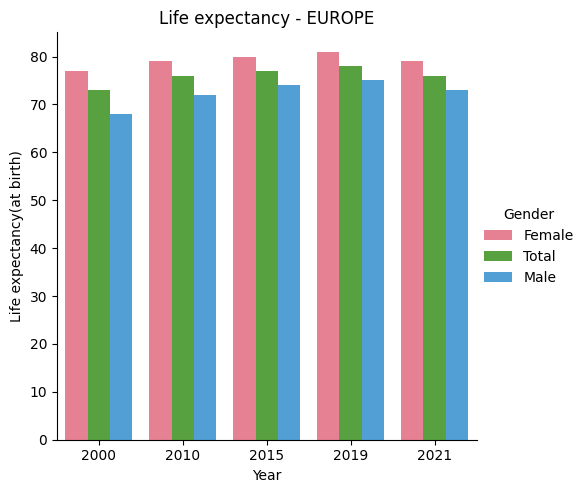

In [40]:
plt.figure(figsize=(6,5))
hue_order = ['Female', 'Total', 'Male']
sns.catplot(x='Year', y='Life expectancy(at birth)', col='Location',hue='Gender', hue_order=hue_order,\
            kind="bar", data=who_reg_euro, palette="husl").set(title='Life expectancy - EUROPE')

In [41]:
who_reg_eu_mean = who_reg_euro.copy()
who_reg_eu_mean = who_reg_euro['Life expectancy(at birth)'].mean()
who_reg_eu_mean

75.86666666666666

/kas/python_stacks/python_311_data_science/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

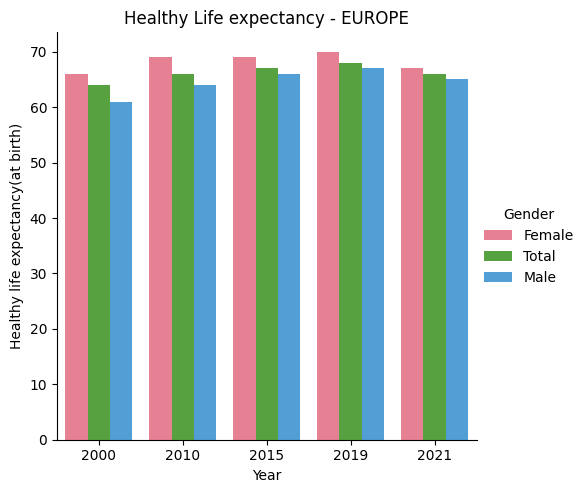

In [42]:
plt.figure(figsize=(10,8))
hue_order = ['Female', 'Total', 'Male']
sns.catplot(x='Year', y='Healthy life expectancy(at birth)', col='Location',hue='Gender',hue_order=hue_order,\
            kind="bar", data=who_reg_euro, palette="husl").set(title='Healthy Life expectancy - EUROPE')


In [43]:
who_reg_eu_mean = who_reg_euro.copy()
who_reg_eu_mean = who_reg_eu_mean['Healthy life expectancy(at birth)'].mean()
who_reg_eu_mean

66.33333333333333

In summary, while life expectancy has improved worldwide, disparities exist between regions. Africa faces unique health challenges, impacting both overall life expectancy and healthy life expectancy. Europe tends to have higher life expectancy and healthier years lived.

### Top 10 Countries Life expectancy in the year 2000

In [44]:
df_country = df_merging.copy()
df_country = df_country[df_country['Year']==2000].sort_values(by=["Life expectancy(at birth)"], ascending = False)
top10countries = df_country.head(10)
top10countries

,Year,Area Code,Geographic Dimension,Location,Gender,Life expectancy(at birth),Healthy life expectancy(at birth)
1454,2000,392,Country,Japan,Female,84.0,74.0
1516,2000,250,Country,France,Female,83.0,71.0
1182,2000,724,Country,Spain,Female,82.0,71.0
401,2000,756,Country,Switzerland,Female,82.0,71.0
1253,2000,124,Country,Canada,Female,82.0,71.0
134,2000,36,Country,Australia,Female,82.0,70.0
545,2000,752,Country,Sweden,Female,82.0,71.0
474,2000,380,Country,Italy,Female,82.0,70.0
647,2000,352,Country,Iceland,Female,82.0,70.0
1459,2000,56,Country,Belgium,Female,81.0,70.0


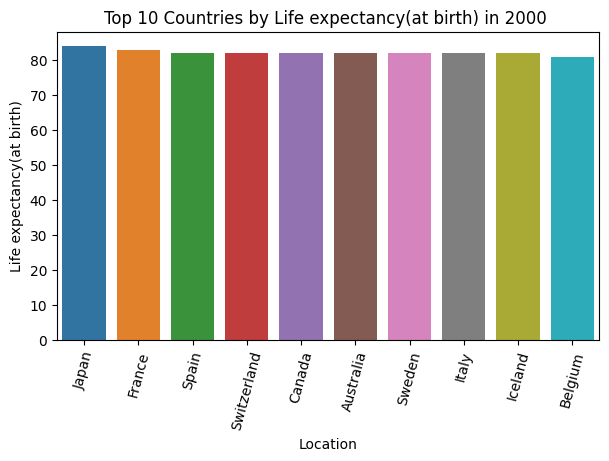

In [45]:
plt.figure(figsize=(7,4))
sns.barplot(x='Location', 
            y='Life expectancy(at birth)', 
            data=top10countries).set(title='Top 10 Countries by Life expectancy(at birth) in 2000 ')
plt.xticks(rotation=75)
plt.show();

### Top 10 Countries Life expectancy in the year 2021

In [46]:
df_country = df_merging.copy()
df_country = df_country[df_country['Year']==2021].sort_values(by=["Life expectancy(at birth)"], ascending = False)
top10countries = df_country.head(10)
top10countries

,Year,Area Code,Geographic Dimension,Location,Gender,Life expectancy(at birth),Healthy life expectancy(at birth)
24,2021,392,Country,Japan,Female,87.0,75.0
623,2021,410,Country,Republic of Korea,Female,87.0,74.0
779,2021,702,Country,Singapore,Female,86.0,75.0
43,2021,250,Country,France,Female,85.0,71.0
1479,2021,36,Country,Australia,Female,85.0,71.0
774,2021,756,Country,Switzerland,Female,85.0,71.0
769,2021,724,Country,Spain,Female,85.0,72.0
389,2021,442,Country,Luxembourg,Female,85.0,72.0
386,2021,620,Country,Portugal,Female,84.0,70.0
395,2021,470,Country,Malta,Female,84.0,71.0


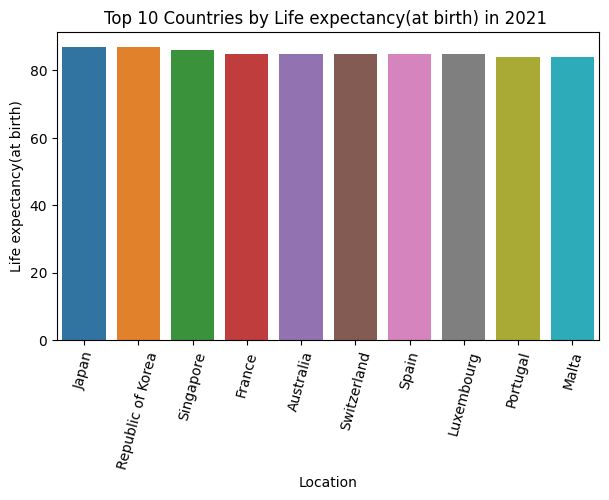

In [47]:
plt.figure(figsize=(7,4))
sns.barplot(x='Location', 
            y='Life expectancy(at birth)', 
            data=top10countries).set(title='Top 10 Countries by Life expectancy(at birth) in 2021 ')
plt.xticks(rotation=75)
plt.show();

If we examine the differences between the two bar charts for the years 2000/2021, we see that Japan is in the top place in both years. France drops from second to fourth place, followed by Spain, which drops significantly to seventh place, Switzerland from fourth to sixth place and Australia moves up one place from sixth to fifth place. Some other countries have lost their top 10 positions in 2021, while others have taken their place.

### World Bank Income Group regions

Life expectancy at birth is a key metric reflecting the average number of years a person can expect to live from birth, considering current mortality rates. Across the globe, life expectancy varies widely due to factors such as healthcare access, socio-economic conditions, and lifestyle choices. Developed nations often boast higher life expectancies, typically ranging from 75 to 85 years, owing to advanced healthcare systems and improved living standards. In contrast, developing nations often face shorter life expectancies, frequently falling below 70 years, largely due to inadequate healthcare infrastructure and prevailing socio-economic challenges. These disparities underscore the critical importance of global efforts to enhance healthcare access and address socio-economic inequalities.

In [48]:
world_bank = df_merging.copy()
world_bank = df_merging[df_merging['Geographic Dimension'] =='Worldbankincomegroup'].sort_values(by="Gender")
world_bank.head()

,Year,Area Code,Geographic Dimension,Location,Gender,Life expectancy(at birth),Healthy life expectancy(at birth)
106,2019,912,Worldbankincomegroup,Lower-middle-income economies,Female,71.0,61.0
1756,2019,910,Worldbankincomegroup,High-income economies,Female,83.0,71.0
1510,2000,912,Worldbankincomegroup,Lower-middle-income economies,Female,64.0,54.0
1448,2015,911,Worldbankincomegroup,Low-income economies,Female,65.0,56.0
1444,2000,910,Worldbankincomegroup,High-income economies,Female,81.0,69.0


In [49]:
world_bank['Location'] = world_bank['Location'].replace({"Lower-middle-income economies":"Low-mid-inc-ecos",\
                        "High-income economies":"High-inc-ecos", "Low-income economies":"Low-inc-ecos",\
                        "Upper-middle-income economies":"Upper-mid-inc ecos" })  
world_bank.head(10)

,Year,Area Code,Geographic Dimension,Location,Gender,Life expectancy(at birth),Healthy life expectancy(at birth)
106,2019,912,Worldbankincomegroup,Low-mid-inc-ecos,Female,71.0,61.0
1756,2019,910,Worldbankincomegroup,High-inc-ecos,Female,83.0,71.0
1510,2000,912,Worldbankincomegroup,Low-mid-inc-ecos,Female,64.0,54.0
1448,2015,911,Worldbankincomegroup,Low-inc-ecos,Female,65.0,56.0
1444,2000,910,Worldbankincomegroup,High-inc-ecos,Female,81.0,69.0
1280,2000,914,Worldbankincomegroup,Upper-mid-inc ecos,Female,74.0,64.0
1235,2000,911,Worldbankincomegroup,Low-inc-ecos,Female,55.0,48.0
607,2019,914,Worldbankincomegroup,Upper-mid-inc ecos,Female,79.0,69.0
1509,2015,910,Worldbankincomegroup,High-inc-ecos,Female,83.0,71.0
418,2010,912,Worldbankincomegroup,Low-mid-inc-ecos,Female,68.0,58.0


/kas/python_stacks/python_311_data_science/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x700 with 0 Axes>

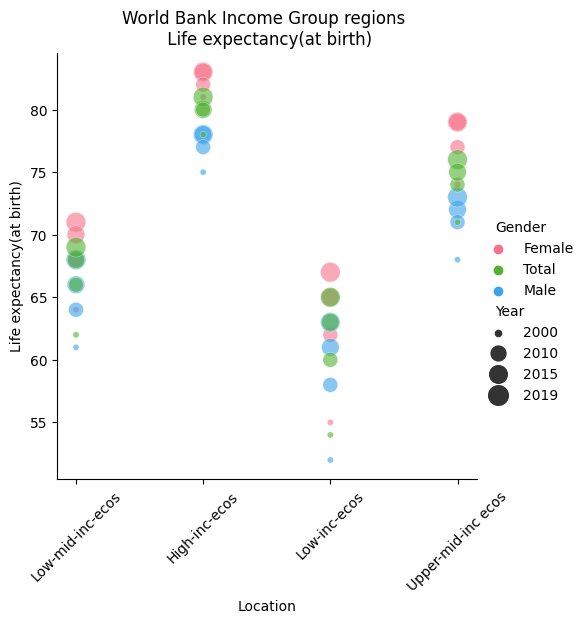

In [50]:
plt.figure(figsize=(6, 7))
hue_order = ['Female', 'Total', 'Male']
sns.relplot(x='Location', y='Life expectancy(at birth)', hue='Gender', hue_order=hue_order, size='Year',
            sizes=(20, 200), alpha=.6, palette="husl",
            height=5, data=world_bank).set(title='World Bank Income Group regions \n Life expectancy(at birth)')
plt.xticks(rotation=45);
plt.show()

/kas/python_stacks/python_311_data_science/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x700 with 0 Axes>

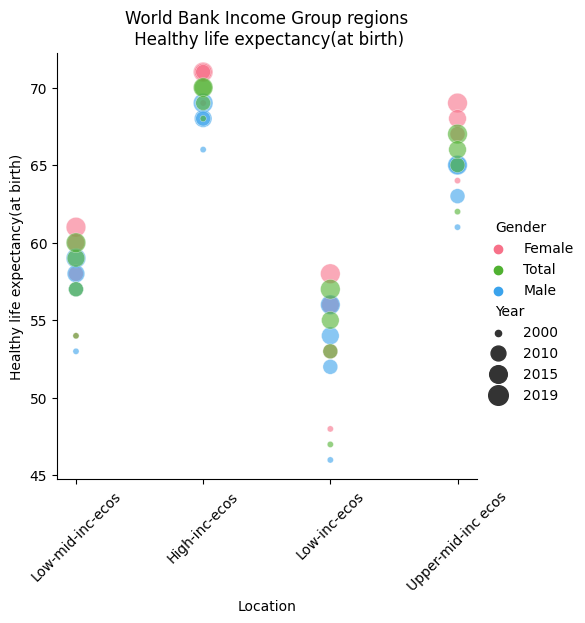

In [51]:
plt.figure(figsize=(6, 7))
hue_order = ['Female', 'Total', 'Male']
sns.relplot(x='Location', y='Healthy life expectancy(at birth)', hue='Gender', hue_order=hue_order, size='Year',
            sizes=(20, 200), alpha=.6, palette="husl",
            height=5, data=world_bank).set(title='World Bank Income Group regions\n Healthy life expectancy(at birth)')
plt.xticks(rotation=45);
plt.show()

In [52]:
low_iecs = world_bank.copy()
low_iecs = world_bank[world_bank['Location'] == 'Low-inc-ecos']
low_iecs_T = low_iecs[low_iecs['Gender'] == 'Total']
low_iecs_T.max()

Year                                                 2019
Area Code                                             911
Geographic Dimension                 Worldbankincomegroup
Location                                     Low-inc-ecos
Gender                                              Total
Life expectancy(at birth)                            65.0
Healthy life expectancy(at birth)                    57.0
dtype: object

In [53]:
low_iecs = world_bank.copy()
low_iecs = world_bank[world_bank['Location'] == 'Low-inc-ecos']
low_iecs_M = low_iecs[low_iecs['Gender'] == 'Male']
low_iecs_M.max()

Year                                                 2019
Area Code                                             911
Geographic Dimension                 Worldbankincomegroup
Location                                     Low-inc-ecos
Gender                                               Male
Life expectancy(at birth)                            63.0
Healthy life expectancy(at birth)                    56.0
dtype: object

In [54]:
low_iecs = world_bank.copy()
low_iecs = world_bank[world_bank['Location'] == 'Low-inc-ecos']
low_iecs_F = low_iecs[low_iecs['Gender'] =='Female']
low_iecs_F.max()

Year                                                 2019
Area Code                                             911
Geographic Dimension                 Worldbankincomegroup
Location                                     Low-inc-ecos
Gender                                             Female
Life expectancy(at birth)                            67.0
Healthy life expectancy(at birth)                    58.0
dtype: object

In [55]:
low_mid_iecs = world_bank.copy()
low_mid_iecs = world_bank[world_bank['Location'] == 'Low-mid-inc-ecos']
low_mid_iecs_T = low_mid_iecs[low_mid_iecs['Gender'] == 'Total']
low_mid_iecs_T.max()

Year                                                 2019
Area Code                                             912
Geographic Dimension                 Worldbankincomegroup
Location                                 Low-mid-inc-ecos
Gender                                              Total
Life expectancy(at birth)                            69.0
Healthy life expectancy(at birth)                    60.0
dtype: object

In [56]:
low_mid_iecs = world_bank.copy()
low_mid_iecs = world_bank[world_bank['Location'] == 'Low-mid-inc-ecos']
low_mid_iecs_T = low_mid_iecs[low_mid_iecs['Gender'] == 'Male']
low_mid_iecs_T.max()

Year                                                 2019
Area Code                                             912
Geographic Dimension                 Worldbankincomegroup
Location                                 Low-mid-inc-ecos
Gender                                               Male
Life expectancy(at birth)                            68.0
Healthy life expectancy(at birth)                    59.0
dtype: object

In [57]:
low_mid_iecs = world_bank.copy()
low_mid_iecs = world_bank[world_bank['Location'] == 'Low-mid-inc-ecos']
low_mid_iecs_T = low_mid_iecs[low_mid_iecs['Gender'] == 'Female']
low_mid_iecs_T.max()

Year                                                 2019
Area Code                                             912
Geographic Dimension                 Worldbankincomegroup
Location                                 Low-mid-inc-ecos
Gender                                             Female
Life expectancy(at birth)                            71.0
Healthy life expectancy(at birth)                    61.0
dtype: object

In [58]:
upper_mid_iecs = world_bank.copy()
upper_mid_iecs = world_bank[world_bank['Location'] == 'Upper-mid-inc ecos']
upper_mid_iecs_T = upper_mid_iecs[upper_mid_iecs['Gender'] == 'Total']
upper_mid_iecs_T.max()

Year                                                 2019
Area Code                                             914
Geographic Dimension                 Worldbankincomegroup
Location                               Upper-mid-inc ecos
Gender                                              Total
Life expectancy(at birth)                            76.0
Healthy life expectancy(at birth)                    67.0
dtype: object

In [59]:
upper_mid_iecs = world_bank.copy()
upper_mid_iecs = world_bank[world_bank['Location'] == 'Upper-mid-inc ecos']
upper_mid_iecs_T = upper_mid_iecs[upper_mid_iecs['Gender'] == 'Male']
upper_mid_iecs_T.max()

Year                                                 2019
Area Code                                             914
Geographic Dimension                 Worldbankincomegroup
Location                               Upper-mid-inc ecos
Gender                                               Male
Life expectancy(at birth)                            73.0
Healthy life expectancy(at birth)                    65.0
dtype: object

In [60]:
upper_mid_iecs = world_bank.copy()
upper_mid_iecs = world_bank[world_bank['Location'] == 'Upper-mid-inc ecos']
upper_mid_iecs_T = upper_mid_iecs[upper_mid_iecs['Gender'] == 'Female']
upper_mid_iecs_T.max()

Year                                                 2019
Area Code                                             914
Geographic Dimension                 Worldbankincomegroup
Location                               Upper-mid-inc ecos
Gender                                             Female
Life expectancy(at birth)                            79.0
Healthy life expectancy(at birth)                    69.0
dtype: object

In [61]:
high_iecs = world_bank.copy()
high_iecs = world_bank[world_bank['Location'] == 'High-inc-ecos']
high_iecs_T = high_iecs[high_iecs['Gender'] == 'Total']
high_iecs_T.max()

Year                                                 2019
Area Code                                             910
Geographic Dimension                 Worldbankincomegroup
Location                                    High-inc-ecos
Gender                                              Total
Life expectancy(at birth)                            81.0
Healthy life expectancy(at birth)                    70.0
dtype: object

In [62]:
high_iecs = world_bank.copy()
high_iecs = world_bank[world_bank['Location'] == 'High-inc-ecos']
high_iecs_T = high_iecs[high_iecs['Gender'] == 'Male']
high_iecs_T.max()

Year                                                 2019
Area Code                                             910
Geographic Dimension                 Worldbankincomegroup
Location                                    High-inc-ecos
Gender                                               Male
Life expectancy(at birth)                            78.0
Healthy life expectancy(at birth)                    69.0
dtype: object

In [63]:
high_iecs = world_bank.copy()
high_iecs = world_bank[world_bank['Location'] == 'High-inc-ecos']
high_iecs_T = high_iecs[high_iecs['Gender'] == 'Female']
high_iecs_T.max()

Year                                                 2019
Area Code                                             910
Geographic Dimension                 Worldbankincomegroup
Location                                    High-inc-ecos
Gender                                             Female
Life expectancy(at birth)                            83.0
Healthy life expectancy(at birth)                    71.0
dtype: object

Low-income countries:
Life expectancy at birth: 65 years (both sexes), 63 years (males), and 67 years (females).
HALE at birth: 57 years (both sexes), 56 years (males), and 58 years (females).

Lower-middle-income countries:
Life expectancy at birth: 69 years (both sexes), 68 years (males), and 71 years (females).
HALE at birth: 60 years (both sexes), 59 years (males), and 61 years (females).

Upper-middle-income countries:
Life expectancy at birth: 76 years (both sexes), 73 years (males), and 79 years (females).
HALE at birth: 67 years (both sexes), 66 years (males), and 69 years (females).

High-income countries:
Life expectancy at birth: 81 years (both sexes), 78 years (males), and 83 years (females).
HALE at birth: 70 years (both sexes), 69 years (males), and 71 years (females).


#### National liberation movement and organized, unincorporated territories

In [64]:
nat_lib_move = df_merging.copy()
nat_lib_move =df_merging[df_merging['Geographic Dimension']=="National liberation movement"].sort_values\
(by=["Life expectancy(at birth)","Healthy life expectancy(at birth)"], ascending=False)
nat_lib_move.head()

,Year,Area Code,Geographic Dimension,Location,Gender,Life expectancy(at birth),Healthy life expectancy(at birth)
791,2021,275,National liberation movement,"occupied Palestinian territory, including east...",Female,76.0,64.0
2063,2021,275,National liberation movement,"occupied Palestinian territory, including east...",Total,73.0,63.0
951,2021,275,National liberation movement,"occupied Palestinian territory, including east...",Male,71.0,62.0


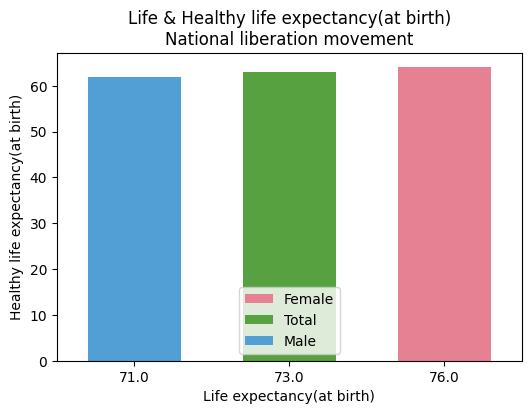

In [65]:
hue_order = ['Male', 'Total','Female']
plt.figure(figsize=(6,4))
ax = sns.barplot(x='Life expectancy(at birth)', y='Healthy life expectancy(at birth)',hue="Gender", width=0.6,
            data=nat_lib_move, palette="husl", dodge=False).set(title="Life & Healthy life expectancy(at birth)\nNational liberation movement")
plt.legend(loc='lower center')
plt.show()

#### Organized, unincorporated territory

In [66]:
org_uninc_terr = df_merging.copy()
org_uninc_terr = df_merging[df_merging['Geographic Dimension']=="Organized, unincorporated territory"].sort_values\
(by=["Life expectancy(at birth)","Healthy life expectancy(at birth)"], ascending=False) 
org_uninc_terr


,Year,Area Code,Geographic Dimension,Location,Gender,Life expectancy(at birth),Healthy life expectancy(at birth)
387,2021,630,"Organized, unincorporated territory",Puerto Rico,Female,84.0,71.0
2073,2021,630,"Organized, unincorporated territory",Puerto Rico,Total,80.0,69.0
977,2021,630,"Organized, unincorporated territory",Puerto Rico,Male,76.0,67.0


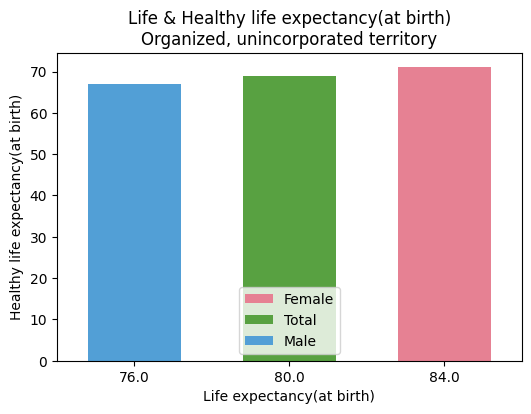

In [67]:
hue_order = ['Male', 'Total','Female']
plt.figure(figsize=(6,4))
ax2 = sns.barplot(x='Life expectancy(at birth)', y='Healthy life expectancy(at birth)',hue="Gender",width=0.6,
            data=org_uninc_terr, palette="husl", dodge=False).set(title="Life & Healthy life expectancy(at birth)\nOrganized, unincorporated territory")
plt.legend(loc='lower center')

plt.show()


### Average years spent in poor health

The average number of years lived in poor health is the average life expectancy minus the average number of years lived in good health (healthy life expectancy). An increase in the average number of years lived in poor health is often referred to as ‘expansion of morbidity’, whereas a reduction is referred to as ‘compression of morbidity’

In [68]:
avg_poor_health = df_merging.copy()
avg_poor_health['Years lived in Poor Health'] = df_merging["Life expectancy(at birth)"] - df_merging["Healthy life expectancy(at birth)"]
avg_poor_health.head()

,Year,Area Code,Geographic Dimension,Location,Gender,Life expectancy(at birth),Healthy life expectancy(at birth),Years lived in Poor Health
0,2000,953,Whoregion,Africa,Female,54.0,47.0,7.0
1,2019,32,Country,Argentina,Female,80.0,69.0,11.0
2,2000,64,Country,Bhutan,Female,67.0,57.0,10.0
3,2019,428,Country,Latvia,Female,80.0,69.0,11.0
4,2019,384,Country,Côte d'Ivoire,Female,66.0,56.0,10.0


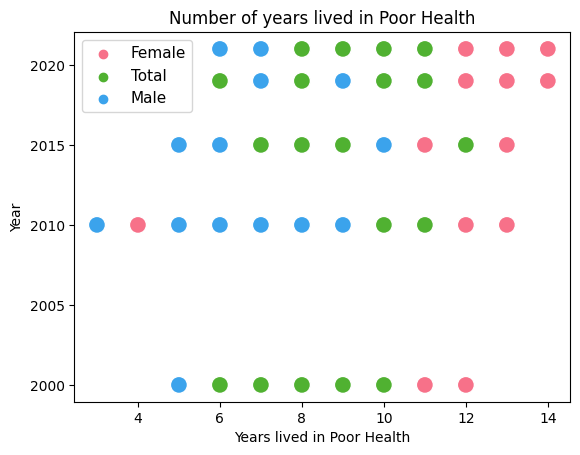

In [69]:
hue_order = ['Female', 'Total', 'Male']
sns.scatterplot(x='Years lived in Poor Health', y='Year',data=avg_poor_health, hue ='Gender', 
                hue_order=hue_order, palette="husl", s=150).set_title('Number of years lived in Poor Health')
plt.legend(fontsize=11, loc='upper left')
plt.show()

Women live longer than men, even though many of the recognised social determinants of health are worse for women than men. No existing explanations account fully for these differences in life expectancy, although they do highlight the complexity and interaction of biological, social and health service factors.
Life expectancy at birth is widely recognized as a summary measure of mortality that allows the extent and trend of health inequalities to be compared within and across societies. 
Since 2000, in all countries in the world, women have lived longer than men, but paradoxically report more illness than men.
Depression and mental health issues, which are slightly higher among women, are also one explanation as to why women live more years in ill-health than men.
